In [1]:
!pip install tradermade

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tradermade: filename=tradermade-0.8.0-py3-none-any.whl size=4987 sha256=ec9ace6ed3bdebc4031cca956114c215f50019729c9d7f84352e0df724455c1d
  Stored in directory: /root/.cache/pip/wheels/a5/fb/46/b09b24e11ba2348f55b1f50fb7a3055677ed307cbb19765271
  Created wheel for websockets: filename=websockets-8.1-cp310-cp310-linux_x86_64.whl size=73425 sha256=a53509cc717e8efd40b1ca975b58b33ae89f0bf71c02e50202c1fa10d12799b3
  Stored in directory: /root/.cache/pip/wheels/98/3f/c7/9993dad06631d258fb8a01677090029dbdbd884a6199c31483
Successfully built tradermade websockets


In [2]:
import tradermade as tm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tm.set_rest_api_key("8n_Si9kCUfPcUafsO6I5")
df_month = tm.timeseries(currency='AUDUSD,CADUSD,EURUSD,JPYUSD,NZDUSD,NOKUSD,GBPUSD,SEKUSD,CHFUSD',start="2023-11-10",end="2023-12-10",interval="daily",fields=["close"])
df_day = tm.timeseries(currency='AUDUSD,CADUSD,EURUSD,JPYUSD,NZDUSD,NOKUSD,GBPUSD,SEKUSD,CHFUSD',start="2023-12-13-00:00",end="2023-12-14-00:00",interval="hourly",fields=["close"])

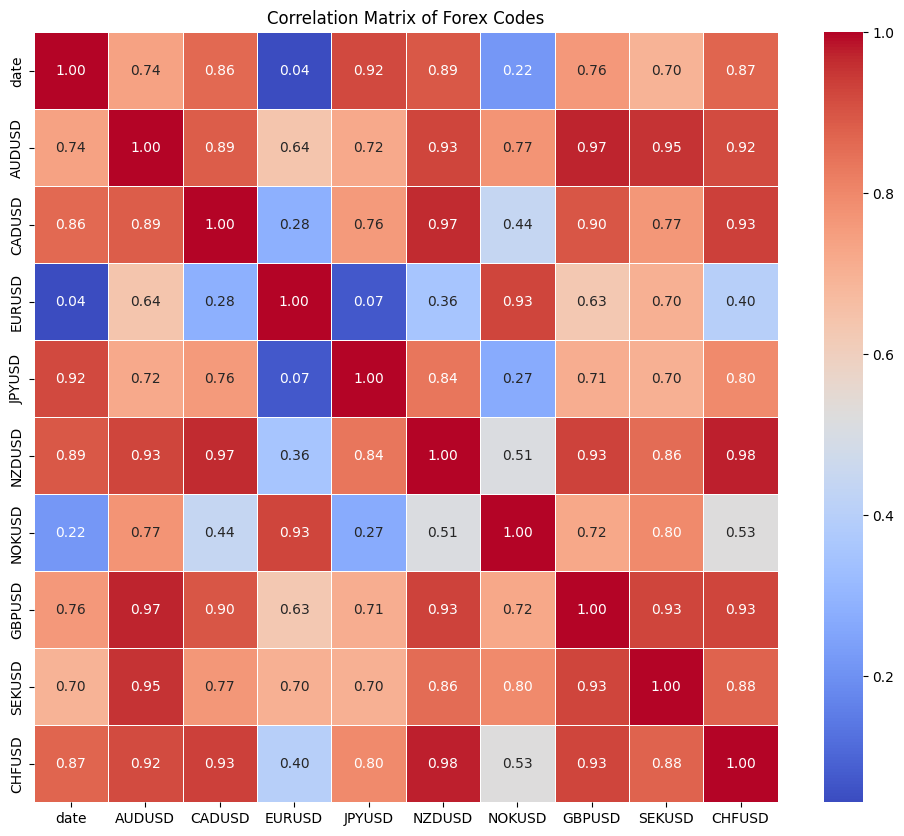

In [4]:
correlation_matrix_month = df_month.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_month, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Forex Codes')
plt.show()

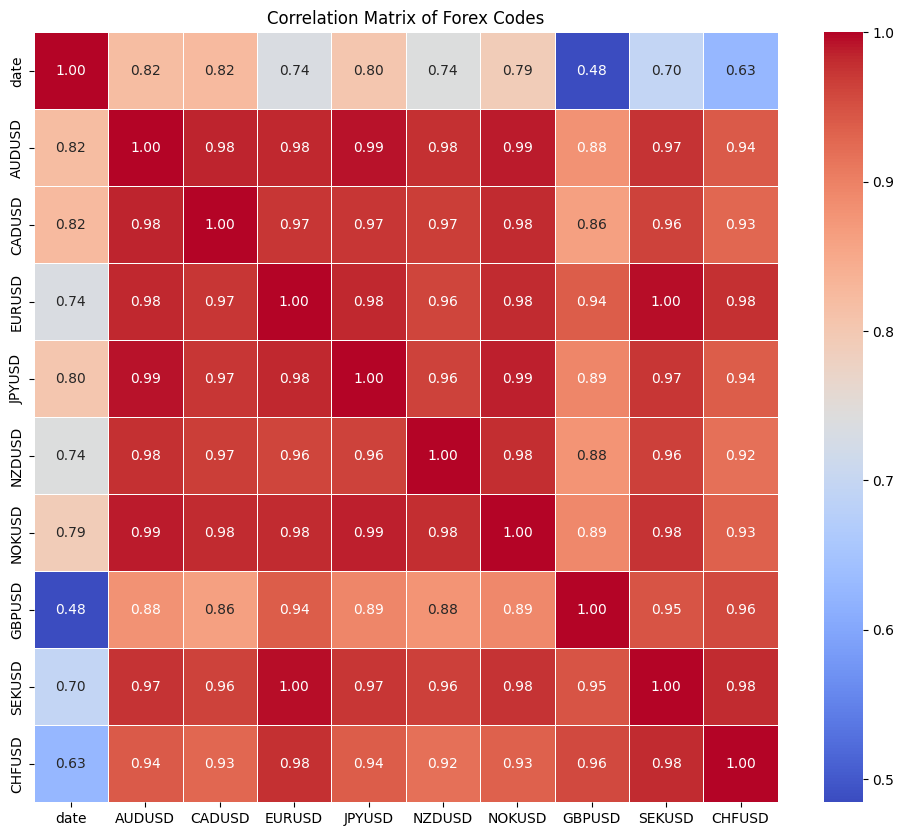

In [6]:
correlation_matrix_day = df_day.corr()

# Create the day Data heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Forex Codes')
plt.show()

In [5]:
stacked_corr = correlation_matrix_month.stack()
filtered_corr = stacked_corr[stacked_corr < 1]
sorted_corr = filtered_corr.sort_values(ascending=False)
sorted_corr

NZDUSD  CHFUSD    0.976927
CHFUSD  NZDUSD    0.976927
GBPUSD  AUDUSD    0.973754
AUDUSD  GBPUSD    0.973754
NZDUSD  CADUSD    0.965820
                    ...   
NOKUSD  date      0.217733
JPYUSD  EURUSD    0.070387
EURUSD  JPYUSD    0.070387
        date      0.043145
date    EURUSD    0.043145
Length: 90, dtype: float64

In [7]:
stacked_corr_day = correlation_matrix_day.stack()
filtered_corr_day = stacked_corr_day[stacked_corr_day < 1]
sorted_corr_day = filtered_corr_day.sort_values(ascending=False)
sorted_corr_day

SEKUSD  EURUSD    0.995496
EURUSD  SEKUSD    0.995496
JPYUSD  AUDUSD    0.992898
AUDUSD  JPYUSD    0.992898
        NOKUSD    0.989642
                    ...   
date    SEKUSD    0.695508
CHFUSD  date      0.627396
date    CHFUSD    0.627396
GBPUSD  date      0.484530
date    GBPUSD    0.484530
Length: 90, dtype: float64

In [8]:
# Daily Returns for Month Data

df_month_CHFUSD = tm.timeseries(currency='CHFUSD', start="2023-11-10", end="2023-12-10", interval="daily", fields=["open", "high", "low", "close"])  # Fetching Month Data for CHFUSD
df_month_CHFUSD['Daily_Return'] = ((df_month_CHFUSD['close'] - df_month_CHFUSD['open']) / df_month_CHFUSD['open']) * 100  # Creating Daily Return Value for CHFUSD
df_month_NZDUSD = tm.timeseries(currency='NZDUSD', start="2023-11-10", end="2023-12-10", interval="daily", fields=["open", "high", "low", "close"])  # Fetching Month Data for NZDUSD
df_month_NZDUSD['Daily_Return'] = ((df_month_NZDUSD['close'] - df_month_NZDUSD['open']) / df_month_NZDUSD['open']) * 100  # Creating Daily Return Value for NZDUSD

# Daily Returns for Day Data

df_day_SEKUSD = tm.timeseries(currency='SEKUSD', start="2023-12-13-00:00", end="2023-12-14-00:00", interval="hourly", fields=["open", "high", "low", "close"])  # Fetching day Data for SEKUSD
df_day_SEKUSD['Daily_Return'] = ((df_day_SEKUSD['close'] - df_day_SEKUSD['open']) / df_day_SEKUSD['open']) * 100  # Creating hourly Return Value for SEKUSD
df_day_EURUSD = tm.timeseries(currency='EURUSD', start="2023-12-13-00:00", end="2023-12-14-00:00", interval="hourly", fields=["open", "high", "low", "close"])  # Fetching day Data for EURUSD
df_day_EURUSD['Daily_Return'] = ((df_day_EURUSD['close'] - df_day_EURUSD['open']) / df_day_EURUSD['open']) * 100  # Creating hourly Return Value for EURUSD
df_day_CHFUSD = tm.timeseries(currency='CHFUSD', start="2023-12-13-00:00", end="2023-12-14-00:00", interval="hourly", fields=["open", "high", "low", "close"])  # Fetching day Data for CHFUSD
df_day_CHFUSD['Daily_Return'] = ((df_day_CHFUSD['close'] - df_day_CHFUSD['open']) / df_day_CHFUSD['open']) * 100  # Creating hourly Return Value for CHFUSD
df_day_NZDUSD = tm.timeseries(currency='NZDUSD', start="2023-12-13-00:00", end="2023-12-14-00:00", interval="hourly", fields=["open", "high", "low", "close"])  # Fetching day Data for NZDUSD
df_day_NZDUSD['Daily_Return'] = ((df_day_NZDUSD['close'] - df_day_NZDUSD['open']) / df_day_NZDUSD['open']) * 100  # Creating hourly Return Value for NZDUSD


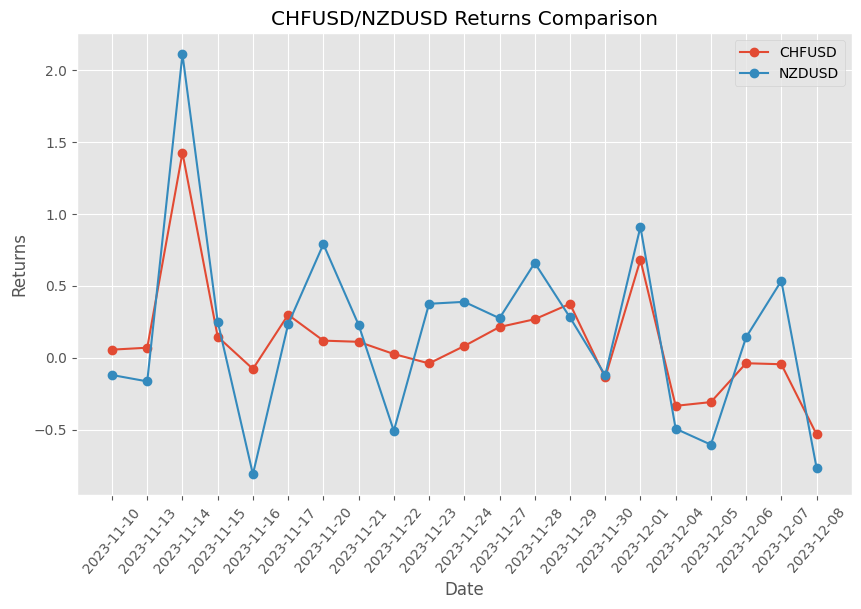

In [9]:
# 1. Comparison of Daily Returns of CHFUSD & NZDUSD on a monthly timeframe

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

plt.plot(df_month_CHFUSD['date'], df_month_CHFUSD['Daily_Return'], label='CHFUSD', marker='o')
plt.plot(df_month_CHFUSD['date'], df_month_NZDUSD['Daily_Return'], label='NZDUSD', marker='o')

plt.title('CHFUSD/NZDUSD Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.xticks(rotation = 50)
plt.grid(True)
plt.show()

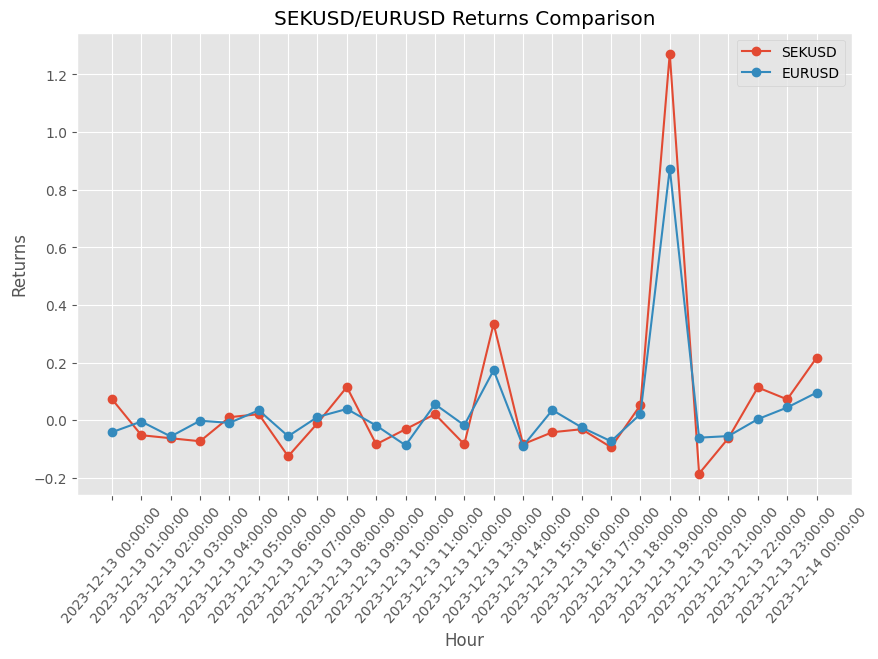

In [10]:
# 2. Comparison of Hourly Returns of SEKUSD & EURUSD on a 1-day timeframe


plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

plt.plot(df_day_SEKUSD['date'], df_day_SEKUSD['Daily_Return'], label='SEKUSD', marker='o')
plt.plot(df_day_SEKUSD['date'], df_day_EURUSD['Daily_Return'], label='EURUSD', marker='o')

plt.title('SEKUSD/EURUSD Returns Comparison')
plt.xlabel('Hour')
plt.ylabel('Returns')
plt.legend()
plt.xticks(rotation = 50)
plt.grid(True)
plt.show()

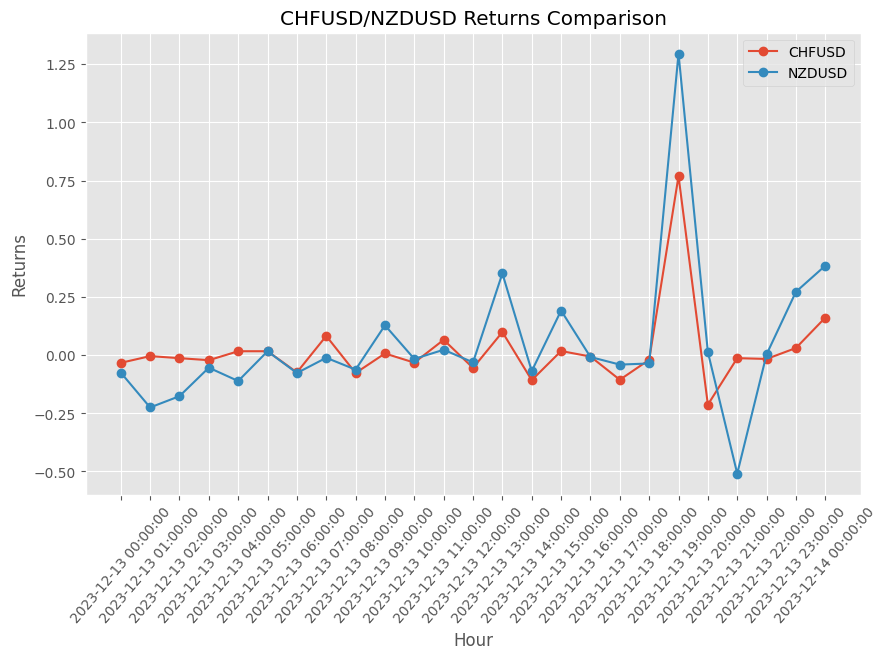

In [11]:
# 3. Comparison of Hourly Returns of CHFUSD & NZDUSD on a 1-day timeframe


plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

plt.plot(df_day_CHFUSD['date'], df_day_CHFUSD['Daily_Return'], label='CHFUSD', marker='o')
plt.plot(df_day_CHFUSD['date'], df_day_NZDUSD['Daily_Return'], label='NZDUSD', marker='o')

plt.title('CHFUSD/NZDUSD Returns Comparison')
plt.xlabel('Hour')
plt.ylabel('Returns')
plt.legend()
plt.xticks(rotation = 50)
plt.grid(True)
plt.show()

In [12]:
def calculate_hedging_ratio(df1, df2):

    # Merge the two DataFrames on the 'date' column
    merged_df = pd.merge(df1[['date', 'Daily_Return']], df2[['date', 'Daily_Return']], on='date', suffixes=('_1', '_2'))

    # Calculate the correlation coefficient between the returns of the two currency pairs
    correlation = merged_df['Daily_Return_1'].corr(merged_df['Daily_Return_2'])

    # Calculate the hedging ratio
    hedging_ratio = - correlation * (df1['Daily_Return'].std() /    df2['Daily_Return'].std())

    print(f"Correlation between the two currency pairs: {correlation}")
    print(f"Hedging Ratio: {hedging_ratio}")

# Calling the function to get the results

calculate_hedging_ratio(df_month_CHFUSD,df_month_NZDUSD) # for daily data
calculate_hedging_ratio(df_day_SEKUSD,df_day_EURUSD) # for hourly data

Correlation between the two currency pairs: 0.8686420501922767
Hedging Ratio: -0.5203035958912856
Correlation between the two currency pairs: 0.9734012730371085
Hedging Ratio: -1.4597042985219284


In [13]:
# For Daily Data
hedging_ratio_CHFUSD_NZDUSD = 0.5203035958912856

# Calculate weights based on hedging ratio
weights_CHFUSD_NZDUSD = {'CHFUSD': 1 / (1 + abs(hedging_ratio_CHFUSD_NZDUSD)), 'NZDUSD': abs(hedging_ratio_CHFUSD_NZDUSD) / (1 + abs(hedging_ratio_CHFUSD_NZDUSD))}

# For Hourly Data
hedging_ratio_SEKUSD_EURUSD = 1.4597042985219284

# Calculate weights based on the hedging ratio
weights_SEKUSD_EURUSD = {'SEKUSD': 1 / (1 + abs(hedging_ratio_SEKUSD_EURUSD)), 'EURUSD': abs(hedging_ratio_SEKUSD_EURUSD) / (1 + abs(hedging_ratio_SEKUSD_EURUSD))}


In [14]:
# For Daily Data
df_next_day = tm.historical(currency='CHFUSD,NZDUSD', date="2023-12-11", interval="daily", fields=["open", "high", "low", "close"])  # Fetching new Day data
df_next_day['Daily_Return'] = ((df_next_day['close'] - df_next_day['open']) / df_next_day['open']) * 100  # Calculating Daily Return

# For Hourly Data
df_next_hour_SEKUSD = tm.timeseries(currency='SEKUSD', start="2023-12-14-00:05", end="2023-12-14-01:00", interval="hourly", fields=["open", "high", "low", "close"])  # Fetching Hourly Data for SEKUSD
df_next_hour_SEKUSD['Hourly_Return'] = ((df_next_hour_SEKUSD['close'] - df_next_hour_SEKUSD['open']) / df_next_hour_SEKUSD['open']) * 100  # Calculating Hourly Return for SEKUSD
df_next_hour_EURUSD = tm.timeseries(currency='EURUSD', start="2023-12-14-00:05", end="2023-12-14-01:00", interval="hourly", fields=["open", "high", "low", "close"])  # Fetching Hourly Data for EURUSD
df_next_hour_EURUSD['Hourly_Return'] = ((df_next_hour_EURUSD['close'] - df_next_hour_EURUSD['open']) / df_next_hour_EURUSD['open']) * 100  # Calculating Hourly Return for EURUSD

In [17]:
# Calculate next hour portfolio return
portfolio_return_next_hour = weights_SEKUSD_EURUSD['SEKUSD'] * df_next_hour_SEKUSD['Hourly_Return'].item() + weights_SEKUSD_EURUSD['EURUSD'] * df_next_hour_EURUSD['Hourly_Return'].item()

# Calculate next day portfolio return
portfolio_return_next_day = weights_CHFUSD_NZDUSD['CHFUSD'] * df_next_day.loc[df_next_day['instrument'] == 'CHFUSD', 'Daily_Return'].values[0] + weights_CHFUSD_NZDUSD['NZDUSD'] * df_next_day.loc[df_next_day['instrument'] == 'NZDUSD', 'Daily_Return'].values[0]

In [22]:
def calculate_and_print_total_return(starting_portfolio_value, portfolio_return_next_day):
    ending_portfolio_value = starting_portfolio_value * (1 + portfolio_return_next_day / 100)
    total_return = (ending_portfolio_value - starting_portfolio_value) / starting_portfolio_value * 100
    print(f"Total Return: {total_return:.2f}%")
    return total_return # Return the calculated total return

# Calling the 'calculate_and_print_total_return' function and storing the results
total_return_daily = calculate_and_print_total_return(1, portfolio_return_next_day)# For Daily Data
total_return_hourly = calculate_and_print_total_return(1, portfolio_return_next_hour)# For Hourly Data

trading_days_in_year_daily = 252  # assuming 252 trading days in a year
trading_hours_per_day_hourly = 8  # Assuming 8 trading hours per day

# Calculate annualized total return for daily data
annualized_total_return_daily = ((1 + total_return_daily / 100) ** (trading_days_in_year_daily / 1)) - 1
print(f"Annualized Total Return (Daily Data): {annualized_total_return_daily * 100:.2f}%")
# Calculate annualized total return for hourly data
annualized_total_return_hourly = ((1 + total_return_hourly / 100) ** (trading_hours_per_day_hourly * trading_hours_per_day_hourly / 1)) - 1
print(f"Annualized Total Return (Hourly Data): {annualized_total_return_hourly * 100:.2f}%")

Total Return: 0.19%
Total Return: 0.03%
Annualized Total Return (Daily Data): 61.63%
Annualized Total Return (Hourly Data): 1.70%
